In [46]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from networkx.algorithms import approximation

# fill this in to generate your initial complete graph, G
m0 = m = 2 
G = nx.complete_graph(m0)
t_max = int(1e4)
degree_distribution_times = [100, 1000, 10000]
degree_distribution_list = []
degree_of_node10 = []
degree_of_node100 = []
degree_of_node1000 = []
N_list = []

average_clustering_coefficient_list = []

for t in range(1, t_max+1):
    # existing number of nodes
    N = len(G)
    # create a network with N + 1 nodes (i.e., add 1 node),
    # starting with our existing G
    G = nx.barabasi_albert_graph(N + 1, m, initial_graph=G)
    # your measurements for parts (a)-(c) can go here, inside the for loop

    # code for part a:
    if t > 10: 
        degree_of_node10.append(G.degree[10])
    if t > 100:
        degree_of_node100.append(G.degree[100])
    if t > 1000:
        degree_of_node1000.append(G.degree[1000])
    

    # code for part b)
    if t == 100:
        degree_distribution_list.append(sorted((d for n, d in G.degree()), reverse=True))
    if t == 1000:
        degree_distribution_list.append(sorted((d for n, d in G.degree()), reverse=True))
    if t == 10000:
        degree_distribution_list.append(sorted((d for n, d in G.degree()), reverse=True))

    # code for part c)
    if N >= 101:
        N_list.append(N)
    if t >= 100:
        average_clustering_coefficient_list.append(np.mean([i for i in nx.clustering(G).values()]))

# a)

9000


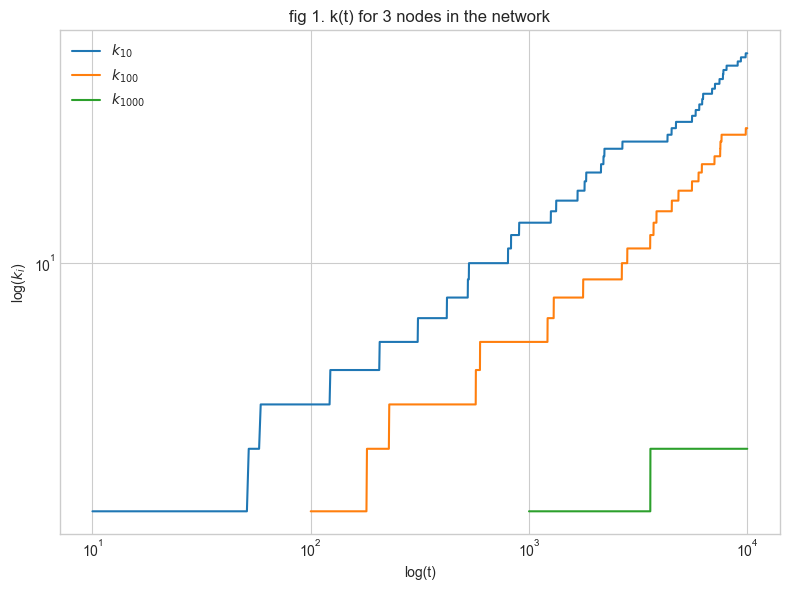

In [128]:
plt.figure(figsize = (8, 6))
plt.style.use('seaborn-v0_8-whitegrid')
print(len(degree_of_node1000))
time_array10 = np.arange(10, t_max, 1)
plt.plot(time_array10, degree_of_node10, label = '$k_{10}$')

time_array100 = np.arange(100, t_max, 1)
plt.plot(time_array100, degree_of_node100, label = '$k_{100}$')

time_array1000 = np.arange(1000, t_max, 1)
plt.plot(time_array1000, degree_of_node1000, label = '$k_{1000}$')

plt.legend()
plt.minorticks_on()
plt.yscale('log')
plt.xscale('log')
plt.xlabel('log(t)')
plt.ylabel(f"log($k_i$)")
plt.title('fig 1. k(t) for 3 nodes in the network')
plt.tight_layout()

plt.show()


# b)

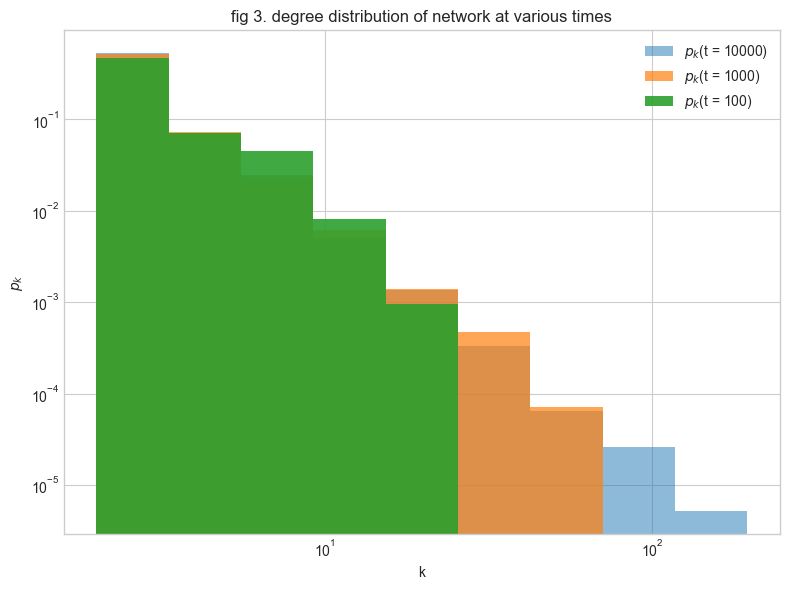

In [127]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(8, 6))

def log_binned_hist(k_array, bins):
    k_min, k_max = k_array.min(), k_array.max()
    log_bins = np.logspace(np.log10(k_min), np.log10(k_max), bins)
    return log_bins

k_100_array = degree_distribution_list[0]
k_1000_array = degree_distribution_list[1]
k_10000_array = degree_distribution_list[2]

all_k = np.concatenate([k_100_array, k_1000_array, k_10000_array])
log_bins = log_binned_hist(all_k, bins=10)

plt.hist(k_10000_array, bins=log_bins, density=True, alpha=0.5, label='$p_k$(t = 10000)')
plt.hist(k_1000_array, bins=log_bins, density=True, alpha=0.7, label='$p_k$(t = 1000)')
plt.hist(k_100_array, bins=log_bins, density=True, alpha=0.9, label='$p_k$(t = 100)')
plt.xlabel("k")
plt.ylabel("$p_k$")
plt.title("fig 3. degree distribution of network at various times")
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.legend()
plt.show()


# c)

/var/folders/2h/xz8d592j62n7f363_sbw7ly00000gn/T/ipykernel_97856/2928568521.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


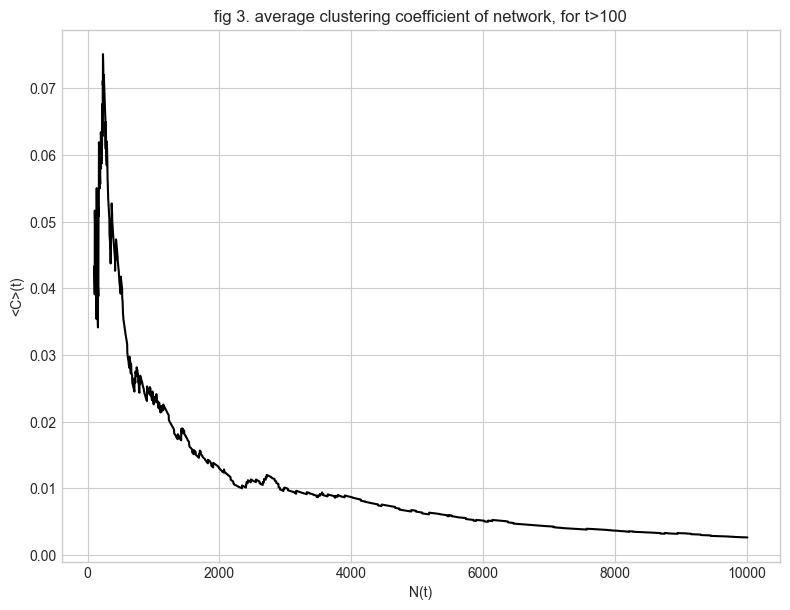

In [133]:
plt.figure(figsize = (8, 6))
plt.style.use('seaborn-v0_8-whitegrid')
plt.minorticks_on()
plt.plot(N_list, average_clustering_coefficient_list, 'k-')
plt.legend()
plt.xlabel('N(t)')
plt.ylabel(f"<C>(t)")
plt.tight_layout()
plt.title('fig 3. average clustering coefficient of network, for t>100')
# plt.xscale('log')
# plt.yscale('log')
plt.show()

# d) 
Comments for fig 1.

* We can see that for node 10, because it was added the earliest in the network, it is able to accumulate the most amount of neighboors as time increases and the network grows up. This is because the probability of any newly added node to form a link with any other node is proportional to that nodes degree. Nodes 100 and 1000 will always have a lower degree than node 10 because they were added later in the network.


Comments for fig 2.

* The characteristics of this plot can be easily explained by our intuition. As the network further evolves in time, there are more and more nodes that will be connected to the hubs that are present in the network, these hubs will grow in size and the nodes that are at the center of these hubs will grow in degree. As a result, there are small probabilities p_k at t = 10000 that we will find nodes with very large degree. The p_k at smaller times has very small probabilities to find nodes with very very large degree because the network has simply not existed for very long.


Comments for fig 3.

* As our intuition suggests, as the network exists for longer and longer times, the average clustering coefficient of the entire network grows smaller and smaller

# 2a)

In [2]:
N = 10000
gamma = 2.1
alpha = 1 / (gamma - 1)
c = 100
hidden_parameter_array = np.array([(c / (1**alpha)) if i == 0 else (c / i**alpha) for i in range(N)])
hidden_parameter_matrix = np.outer(hidden_parameter_array, hidden_parameter_array) / np.sum(hidden_parameter_array)
hidden_parameter_matrix = np.clip(hidden_parameter_matrix, 0.0, 1.0)

hp_graph = nx.Graph()
hp_graph.add_nodes_from(range(N))
node_list = [i for i in range(N)]
rng = np.random.default_rng()
for i in range(N):
    for j in range(i + 1, N):
        if rng.random() < hidden_parameter_matrix[i, j]:
            hp_graph.add_edge(i, j)

k_array = np.array([hp_graph.degree[i] for i in range(N)])
L = 0.5 * np.mean(hidden_parameter_array) * N
print("# of nodes:", N)
print("Number of edges created:", hp_graph.number_of_edges())
print("Expected # of edges (theory):", L)
print("Computed mean degree:", np.mean(k_array))
print("Expected mean degree:", 2 * L / N)

# of nodes: 10000
Number of edges created: 800
Expected # of edges (theory): 799.0933728139674
Computed mean degree: 0.16
Expected mean degree: 0.1598186745627935


# b)

In [3]:
# already computed in above cell but redone here
k_array = np.array([hp_graph.degree[i] for i in range(N)])

# c)

In [4]:
def average(graph, node_number, k_array):
    # records the average degree of all of node's neighbors
    # note: k_array[i] is the degree of node i
    # finds all the neighbors of desired node
    neighbor_list = list(graph[node_number])
    # print(f"The neighbors of node {node_number} are: {neighbor_list}")
    degrees_of_neighbors = np.array([k_array[i] for i in neighbor_list])
    # print(f"The degrees of all of the neighbors of node {node_number} are: {degrees_of_neighbors}")
    if np.mean(degrees_of_neighbors) == np.nan:
        return 0
    else:
        return np.mean(degrees_of_neighbors)

k_nn_i_array = np.array([average(hp_graph, node, k_array) for node in range(N)])

/Users/mattia.altomare/research/initial_code/.venv/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/mattia.altomare/research/initial_code/.venv/lib/python3.13/site-packages/numpy/_core/_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


# d)

10000


/var/folders/2h/xz8d592j62n7f363_sbw7ly00000gn/T/ipykernel_97856/1239471224.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


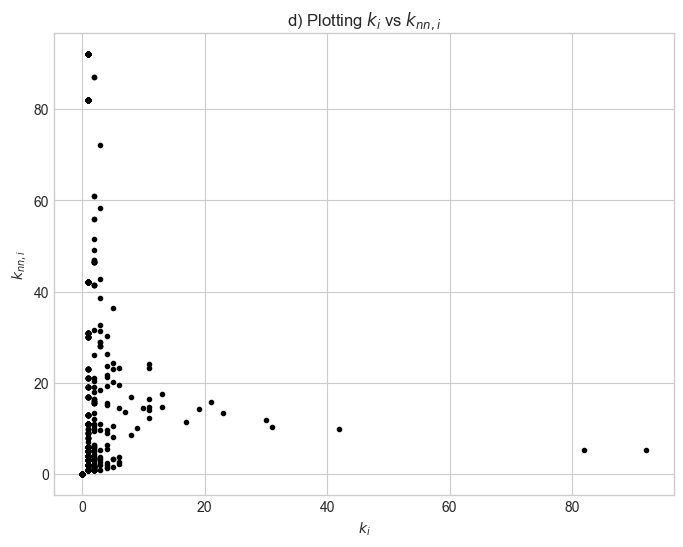

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 6))
plt.minorticks_on()
plt.style.use('seaborn-v0_8-whitegrid')
plt.plot(k_array, k_nn_i_array, 'k.')
plt.legend()
plt.ylabel("$k_{nn,i}$")
plt.xlabel(f"$k_i$")
plt.title("2d) Plotting $k_i$ vs $k_{nn,i}$")
plt.show()

We can see from the plot above that the statements made by the friendship paradox in the problem statement hold some value. On the left side of the graph, we can see that nodes that have very few connections or links (low degree) tend to themselves be linked to nodes that have a very high degree. On the other hand, the nodes that have many many links themselves are almost always connected to nodes that have a very low degree. Therefore, for the average node in the network, it is true that their friends will have more friends than they do.

# e)

Some reasons for why the friendship paradox occurs in real-world social networks can be attributed to a sampling bias. For any given individual in a friend group, their friends tend to be those that are slightly more "popular", because individuals with no or very little friends tend to not appear in anyone's social network. Because more popular people tend to be your friend, they raise the average number of friends that your friends have.